In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce


Проведем предварительную подготовку данных для начала работы.

In [188]:
df = pd.read_csv('ha_data.csv', sep = ';') 

In [189]:
df.head()

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1


In [190]:
df.dtypes

order_id        float64
page_id         float64
product          object
site_version     object
time             object
title            object
user             object
dtype: object

Время имеет тип данных "объект", разделим этот столбец на два "дата" и "время" и переведем их в соответсвубщий формат для удобства использования данных.

In [191]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time

In [192]:
df.tail(40)

,order_id,page_id,product,site_version,time,title,user,date
14877,NaN,776340.0,clothes,mobile,04:56:13,banner_show,user_5138,2017-01-19
14878,NaN,3012206.0,sports_nutrition,mobile,17:12:20,banner_show,user_5138,2017-02-15
14879,NaN,3688845.0,sneakers,mobile,07:41:21,banner_show,user_5138,2017-01-17
14880,NaN,3694501.0,company,mobile,08:00:29,banner_show,user_5138,2017-01-16
14881,NaN,7898446.0,clothes,mobile,16:26:50,banner_show,user_5138,2017-03-11
14882,NaN,11328678.0,sports_nutrition,mobile,04:41:30,banner_show,user_5138,2017-05-02
14883,NaN,12522267.0,sports_nutrition,mobile,02:17:09,banner_show,user_5138,2017-05-14
14884,NaN,12951464.0,sneakers,mobile,06:36:06,banner_show,user_5138,2017-04-25
14885,NaN,16100039.0,company,mobile,17:30:23,banner_show,user_5138,2017-04-24
14886,NaN,24394195.0,sneakers,mobile,17:29:59,banner_show,user_5138,2017-05-27


Видим, что в последней строке есть некорректные данные, удалим её для упрощения анализа, одна строка все равно не повлияет на наш результат.

In [193]:
df = df.drop(df.index[-1])
df.tail(5)

,order_id,page_id,product,site_version,time,title,user,date
14911,NaN,21736.0,sports_nutrition,mobile,14:37:33,banner_show,user_5143,2017-01-14
14912,NaN,21817.0,sneakers,mobile,15:00:52,banner_show,user_5143,2017-01-17
14913,NaN,224146.0,sports_nutrition,mobile,12:41:13,banner_show,user_5143,2017-01-13
14914,NaN,21817.0,sneakers,mobile,15:01:32,banner_click,user_5143,2017-01-17
14915,NaN,21711.0,sports_nutrition,mobile,18:55:37,banner_show,user_5144,2017-01-05


1. Оценка взаомодействия с баннерами в связи с продуктами компании.

 Подсчитаем сколько раз баннер показывался для каждого продукта, сколько раз по неему кликнули, сколько раз была совершена покупка.
Для оценки воспользуемся метриками CTR (процент посетителей сайта, которые кликнули на объявление) и CR (процент пользователей, которые после клика совершили покупку)

Создадим ещё одну подтабицу, для анализа, где сгруппируем данные по категориям заказа и действию, совершенного пользоватеоем на сайте.

In [194]:
product_title = df.groupby(['product', 'title']).size().unstack(fill_value=0)
product_title

title,banner_click,banner_show,order
product,,,
accessories,231,2549,84
clothes,396,2542,181
company,257,2984,0
sneakers,320,2555,92
sports_nutrition,255,2437,33


Таблица выше также показывает, что больше некорректных значений в датасете нет

In [195]:
product_title['CTR'] = (product_title['banner_click'] / product_title['banner_show']) * 100;
product_title['CR'] = (product_title['order'] / product_title['banner_click']) * 100;

product_title

title,banner_click,banner_show,order,CTR,CR
product,,,,,
accessories,231,2549,84,9.062377,36.363636
clothes,396,2542,181,15.578285,45.707071
company,257,2984,0,8.612601,0.000000
sneakers,320,2555,92,12.524462,28.750000
sports_nutrition,255,2437,33,10.463685,12.941176


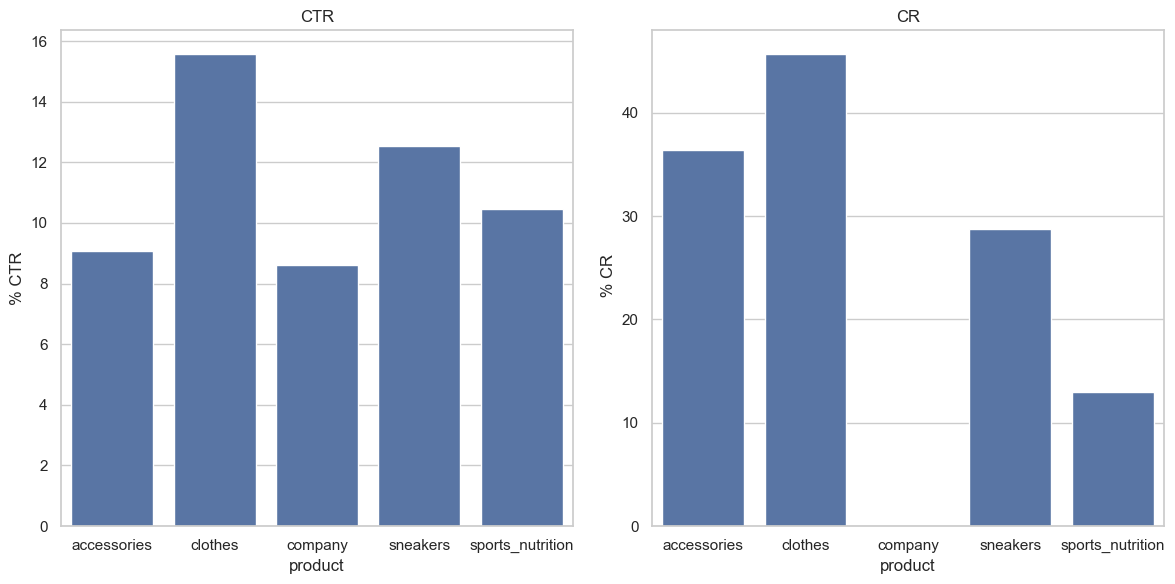

In [196]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x=product_title.index, y=product_title['CTR'])
plt.title('CTR')
plt.ylabel('% CTR')

plt.subplot(1, 2, 2)
sns.barplot(x=product_title.index, y=product_title['CR'])
plt.title('CR')
plt.ylabel(' % CR')

plt.tight_layout()
plt.show()

Вывод:

Больше всего людей привлекают баннеры с рекламой одежды и кроссовок, а наименьшее внимание со стороны пользователя прослеживается к баннерам с рекламой компании и аксессуаров

При этом наиболее привлекательной для покупки категория стала одежда и, внезапно, аксессуары. Компании стоит поработать над баннерами, сделав их более привлекательними, что, вероятно, поднимет продажи акссесуаров. Самыми менее привлекательными к пркупке стали товары из категории спортивного питания, возможно компании стоит подумать о том, как можно улучшить продажи товаров из данной категории,например, пересмотреть их качество/ сделать более приемлемую цену.

Если анализировать количество показов рекламы, то можно обратить вниание, что лидером стал баннер с рекламой самой компании, однако, при клике на баннер покупателю либо не предлагается ничего купить, либо продукт не является привлекательным для потребителя (раз количество покупок после клика на баннер 0%), делаем вывод, что показывать рекламу компаниии является неэффективной стратегией при имеющихся условиях, а значит нужно что-то изменять в ней(заменять на другой баннер/продавать товары при переходе по баннеру/менять продаваемые товары при кликке на баннер).

2. Анализ взаимодействия пользователя с баннерами с зависимости с 'site_version'


Все действия выполняю аналогично предыдущему пункту, только связываю с другой колонкой датасета.

In [197]:
version_title = df.groupby(['site_version', 'title']).size().unstack(fill_value=0)
version_title

title,banner_click,banner_show,order
site_version,,,
desktop,193,3391,234
mobile,1266,9676,156


In [198]:
version_title['CTR'] = (version_title['banner_click'] / version_title['banner_show']) * 100
version_title['CR'] = (version_title['order'] / version_title['banner_click']) * 100
version_title

title,banner_click,banner_show,order,CTR,CR
site_version,,,,,
desktop,193,3391,234,5.691536,121.243523
mobile,1266,9676,156,13.083919,12.322275


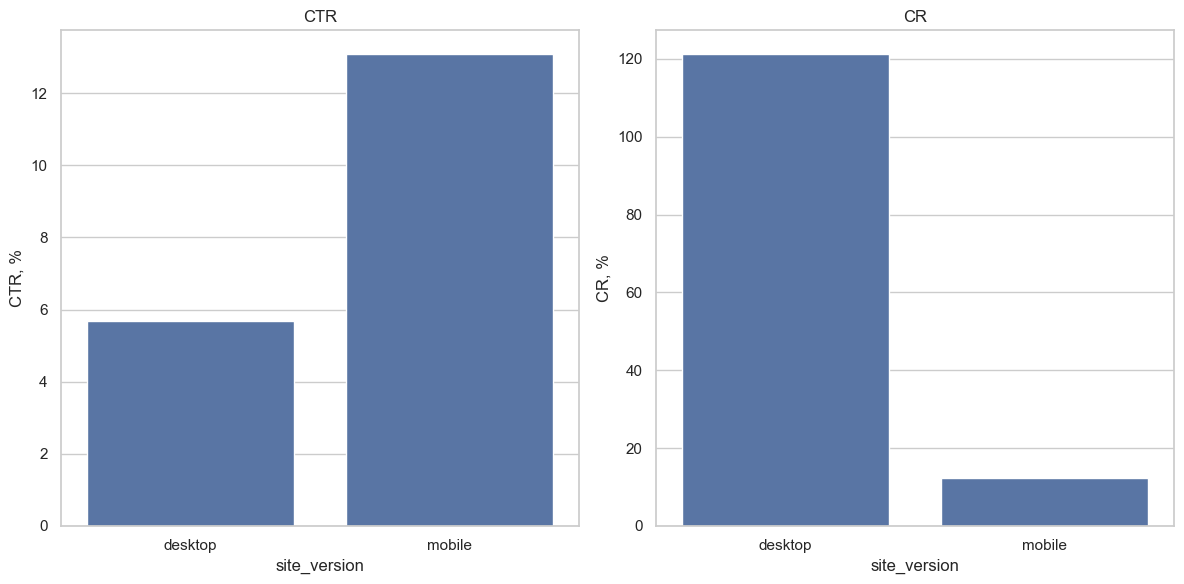

In [199]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(x=version_title.index, y=version_title['CTR'])
plt.title('CTR')
plt.ylabel('CTR, %')

plt.subplot(1, 2, 2)
sns.barplot(x=version_title.index, y=version_title['CR'])
plt.title('CR')
plt.ylabel('CR, %')

plt.tight_layout()
plt.show()

Вывод:

Количество кликов и показов баннеров в мобильной версии сайта значительно отличаются от показателей для компьютерной версии. Это может быть обусловлено тем, что реклама является более привлекательной для покупателей, просматривающих сайт с маленького экрана, именно эти пользователи больше взаимодействуют с рекламой.
Однако, если мы обратим внимание на количество покупок после клика, то видно, что данное значение для покупателей с компьютером гораздо выше, причем значение >100% может свидетельствовать о том, что пользователь совершал сразу несколько покупок после одного клика, либо же покупкы были сделаны вне контекста кликов, что все же говорит о том, что пользователи с десктопной версии сайта более активно покупают товары, а значит необходимо менять стратегию показа рекламы для данной версии сайта, это принесет больший доход, т.к. повысит вовлеченность пользователей. Так же необходимо провести дополнительные исследования, чтобы узнать, почему при значительно большей кликабельности баннеров в мобильной версии сайта, прожада товаров не столь же высокая.

3. Анализ повторных покупок со стороны пользователя.

In [200]:
customers = df[df['title'] == 'order'].groupby('user').size()
repeat_customers = customers[customers > 1].count()
total_customers = df['user'].nunique()

repeat_customers_pers = (repeat_customers / total_customers) * 100
print(f"Процент лояльных пользователей: {repeat_customers_pers:.2f}%")


Процент лояльных пользователей: 0.66%


Вывод:

Очень маленький процент (< 1%) гооврит о том, что покупатели не удовлетворены сервисом или продуктом, из-за чего охваты продаж не столь высокие, какими могли бы быть при большем проценте постоянных покупателей. Необходимо менять стратегию

4. Анализ по покупкам с течением времени.

Рассмотрим, изменялось ли со временем тенденция к покупкам

In [201]:
data_title = df.groupby([df['date'], 'title']).size().unstack(fill_value=0)
data_title['CTR'] = (data_title['banner_click'] / data_title['banner_show']) * 100
data_title['CR'] = (data_title['order'] / data_title['banner_click']) * 100



In [202]:
data_title = df.groupby([df['date'], 'title']).size().unstack(fill_value=0)

data_title

title,banner_click,banner_show,order
date,,,
2017-01-01,10,142,4
2017-01-02,13,144,2
2017-01-03,14,135,1
2017-01-04,23,184,3
2017-01-05,19,165,2
...,...,...,...
2017-05-27,1,9,0
2017-05-28,0,12,0
2017-05-29,3,8,1


In [203]:
data_title['CTR'] = (data_title['banner_click'] / data_title['banner_show']) * 100
data_title['CR'] = (data_title['order'] / data_title['banner_click']) * 100

data_title

title,banner_click,banner_show,order,CTR,CR
date,,,,,
2017-01-01,10,142,4,7.042254,40.000000
2017-01-02,13,144,2,9.027778,15.384615
2017-01-03,14,135,1,10.370370,7.142857
2017-01-04,23,184,3,12.500000,13.043478
2017-01-05,19,165,2,11.515152,10.526316
...,...,...,...,...,...
2017-05-27,1,9,0,11.111111,0.000000
2017-05-28,0,12,0,0.000000,NaN
2017-05-29,3,8,1,37.500000,33.333333


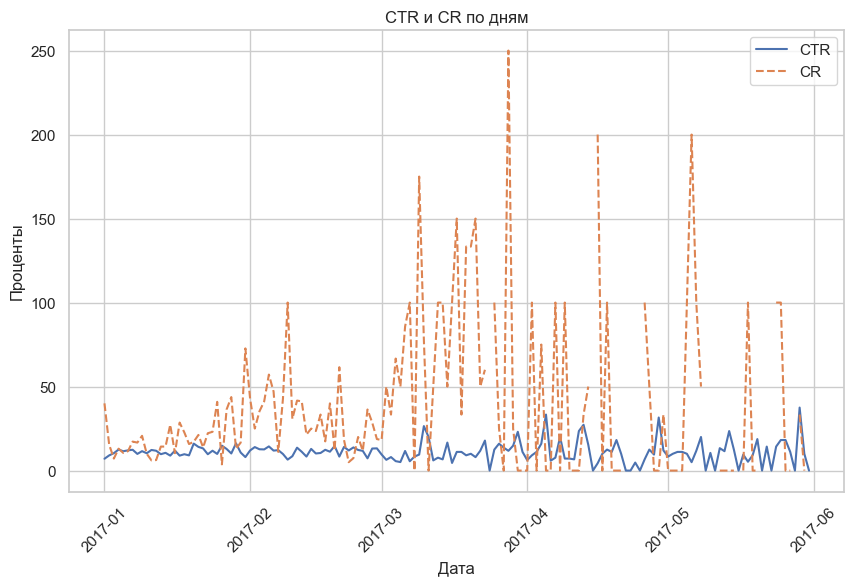

In [204]:
plt.figure(figsize=(10, 6))
plt.plot(data_title.index, data_title['CTR'], label='CTR')
plt.plot(data_title.index, data_title['CR'], label='CR', linestyle='--')
plt.title('CTR и CR по дням')
plt.ylabel('Проценты')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Вывод:

Процент CTR отсается примерно на одном уровне в течение всего года, чего нельзя сказать от проценте покупок. В течене года в среднем больше 50% кликающих на баннеры покупателей покупают в дальейшем понравившейся им товар, а с весня наблюдается резкий рост продаж, который превышает 100% и даже 150%, что говорит о том, что продажи в целом растут с наступлением весны, независимо от рекламы. 


Действительно, выводы, которые сделали маркетологи о том, что "опыт взаимодействия с баннерами может различаться по сегментам, а их эффективность - зависеть от особенностей пользовательского поведения" подтверждается, судя по анализу, проведенному выше.

Однако выводы, которые мы сделали выше не дают нам достаточно информации на поставленный вопрос, тк воздействие рекламы не однозначно на покупателя, ведь баннеры по-разному эффективны в зависисмости от многих факторов. Для полной картины сравним потенциальный доход от продаж с потенциальним доходом от рекламы, т.к мы не знаем среднюю стоимость товаров в каждой категории и не знаем, за какую цены мы будем рекламу, то оценивать будем примерно.

5. Расчет выгоды

In [205]:
product_title_cr = product_title['CR']
product_title_cr = pd.DataFrame(product_title_cr)
product_title_cr = product_title_cr.reset_index()
product_title_cr

,product,CR
0,accessories,36.363636
1,clothes,45.707071
2,company,0.000000
3,sneakers,28.750000
4,sports_nutrition,12.941176


In [206]:
cr = product_title['CR']
type(cr)
cr.to_dict

<bound method Series.to_dict of product
accessories         36.363636
clothes             45.707071
company              0.000000
sneakers            28.750000
sports_nutrition    12.941176
Name: CR, dtype: float64>

In [207]:
cr.dtype

dtype('float64')

In [208]:
price_range = np.arange(10, 500, 30) #задаем диапазон ср. стоимости товаров в $, к примеру
cpc_value = np.arange(0.1, 3.1, 0.1) #задаем диапазон срю стоимости рекламы за клик
cpc_value

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ])

In [209]:
banner_stats = df[df['title'] == 'banner_show'].groupby('product').size().reset_index(name='shows')
click_stats = df[df['title'] == 'banner_click'].groupby('product').size().reset_index(name='clicks')
order_stats = df[df['title'] == 'order'].groupby('product').size().reset_index(name='order')

In [210]:
stats = pd.merge(banner_stats, click_stats, on='product', how='outer').merge(order_stats, on='product', how='outer').fillna(0)

stats = stats.merge(product_title_cr, on='product', how='left')

stats['CR'] = stats['CR'] / 100

stats

,product,shows,clicks,order,CR
0,accessories,2549,231,84.0,0.363636
1,clothes,2542,396,181.0,0.457071
2,company,2984,257,0.0,0.000000
3,sneakers,2555,320,92.0,0.287500
4,sports_nutrition,2437,255,33.0,0.129412


In [211]:
results = []

for cpc in cpc_value:
    for average_order_value in price_range:
        
        # Доход от кликов при продаже рекламы (стоимость за клик умноженная на количество кликов)
        stats['revenue_from_cpc'] = stats['clicks'] * cpc
        
        # Доход от продаж товаров, если мы продаем место под рекламу (без учета заказов после кликов на баннеры)
        stats['revenue_from_sales_without_cpc'] = (stats['order'] - stats['clicks'] * stats['CR'] / 100) * average_order_value
        
        # Доход от продаж при рекламе своих товаров (с учетом всех заказов)
        stats['revenue_from_sales_with_own_ads'] = stats['order'] * average_order_value  

        # Общий доход от рекламы и продаж (если продаем место под рекламу)
        stats['revenue_total_with_cpc'] = stats['revenue_from_cpc'] + stats['revenue_from_sales_without_cpc']
       
        total_revenue_from_cpc = stats['revenue_from_cpc'].sum()  # Общий доход от кликов при продаже рекламы
        total_revenue_from_sales_without_cpc = stats['revenue_from_sales_without_cpc'].sum()  # Доход от продаж без рекламы своих товаров
        total_revenue_from_sales_with_own_ads = stats['revenue_from_sales_with_own_ads'].sum()  # Доход от продаж своих товаров с рекламой
        total_revenue_with_cpc = stats['revenue_total_with_cpc'].sum()  # Общий доход с рекламой

        results.append({
            'CPC': cpc,
            'Average Order Value': average_order_value,
            'Revenue from CPC': total_revenue_from_cpc,
            'Revenue from Sales': total_revenue_from_sales_without_cpc,
            'Total Revenue (With Own Ads)': total_revenue_from_sales_with_own_ads,
            'Revenue from Sales (With Ads)': total_revenue_with_cpc,
            'Is Advertising Profitable': total_revenue_with_cpc > total_revenue_from_sales_with_own_ads
        })

df_results = pd.DataFrame(results)

df_results.tail(60)

,CPC,Average Order Value,Revenue from CPC,Revenue from Sales,Total Revenue (With Own Ads),Revenue from Sales (With Ads),Is Advertising Profitable
450,2.7,250,3939.3,96525.0,97500.0,100464.3,True
451,2.7,280,3939.3,108108.0,109200.0,112047.3,True
452,2.7,310,3939.3,119691.0,120900.0,123630.3,True
453,2.7,340,3939.3,131274.0,132600.0,135213.3,True
454,2.7,370,3939.3,142857.0,144300.0,146796.3,True
455,2.7,400,3939.3,154440.0,156000.0,158379.3,True
456,2.7,430,3939.3,166023.0,167700.0,169962.3,True
457,2.7,460,3939.3,177606.0,179400.0,181545.3,True
458,2.7,490,3939.3,189189.0,191100.0,193128.3,True
459,2.8,10,4085.2,3861.0,3900.0,7946.2,True


In [212]:
df_results.head(60)

,CPC,Average Order Value,Revenue from CPC,Revenue from Sales,Total Revenue (With Own Ads),Revenue from Sales (With Ads),Is Advertising Profitable
0,0.1,10,145.9,3861.0,3900.0,4006.9,True
1,0.1,40,145.9,15444.0,15600.0,15589.9,False
2,0.1,70,145.9,27027.0,27300.0,27172.9,False
3,0.1,100,145.9,38610.0,39000.0,38755.9,False
4,0.1,130,145.9,50193.0,50700.0,50338.9,False
5,0.1,160,145.9,61776.0,62400.0,61921.9,False
6,0.1,190,145.9,73359.0,74100.0,73504.9,False
7,0.1,220,145.9,84942.0,85800.0,85087.9,False
8,0.1,250,145.9,96525.0,97500.0,96670.9,False
9,0.1,280,145.9,108108.0,109200.0,108253.9,False


In [230]:
df_results.iloc[220:280]

,CPC,Average Order Value,Revenue from CPC,Revenue from Sales,Total Revenue (With Own Ads),Revenue from Sales (With Ads),Is Advertising Profitable
220,1.3,490,1896.7,189189.0,191100.0,191085.7,False
221,1.4,10,2042.6,3861.0,3900.0,5903.6,True
222,1.4,40,2042.6,15444.0,15600.0,17486.6,True
223,1.4,70,2042.6,27027.0,27300.0,29069.6,True
224,1.4,100,2042.6,38610.0,39000.0,40652.6,True
225,1.4,130,2042.6,50193.0,50700.0,52235.6,True
226,1.4,160,2042.6,61776.0,62400.0,63818.6,True
227,1.4,190,2042.6,73359.0,74100.0,75401.6,True
228,1.4,220,2042.6,84942.0,85800.0,86984.6,True
229,1.4,250,2042.6,96525.0,97500.0,98567.6,True


In [213]:
def generate_summary(df):
    total_cases = len(df)
    profitable_cases = df[df['Is Advertising Profitable'] == True]
    non_profitable_cases = df[df['Is Advertising Profitable'] == False]
    
    # Рассчитываем процент прибыльных и неприбыльных случаев
    profitable_percent = (len(profitable_cases) / total_cases) * 100
    non_profitable_percent = (len(non_profitable_cases) / total_cases) * 100
    
    if len(profitable_cases) > len(non_profitable_cases):
        print(f"Реклама выгодна в большинстве случаев: {len(profitable_cases)} из {total_cases} ({profitable_percent:.2f}%).")
    else:
        print(f"Реклама невыгодна в большинстве случаев: {len(non_profitable_cases)} из {total_cases} ({non_profitable_percent:.2f}%).")
        
    print("\nПроцентное распределение:")
    print(f"- Процент прибыльных случаев: {profitable_percent:.2f}%")
    print(f"- Процент неприбыльных случаев: {non_profitable_percent:.2f}%")

# Генерация вывода
generate_summary(df_results)


Реклама выгодна в большинстве случаев: 404 из 510 (79.22%).

Процентное распределение:
- Процент прибыльных случаев: 79.22%
- Процент неприбыльных случаев: 20.78%


In [232]:
for cpc in df_results['CPC'].unique():
    cpc_data = df_results[df_results['CPC'] == cpc]
    
    if cpc_data['Is Advertising Profitable'].all():
        print(f"Минимальное значение CPC, при котором реклама  выгодна для всех средних стоимостей товара: {round(cpc, 2)}")
        break
else:
    print("Нет такого значения CPC, при котором реклама всегда выгодна для всех средних стоимостей товара.")


Минимальное значение CPC, при котором реклама  выгодна для всех средних стоимостей товара: 1.4


In [235]:
filtered_df = df_results[df_results['CPC'] < 1.4]

profitable_cases = filtered_df[filtered_df['Is Advertising Profitable'] == True]
non_profitable_cases = filtered_df[filtered_df['Is Advertising Profitable'] == False]

print(f"Прибыльных случаев: {len(profitable_cases)}")
print(f"Неприбыльных случаев: {len(non_profitable_cases)}")


Прибыльных случаев: 115
Неприбыльных случаев: 106


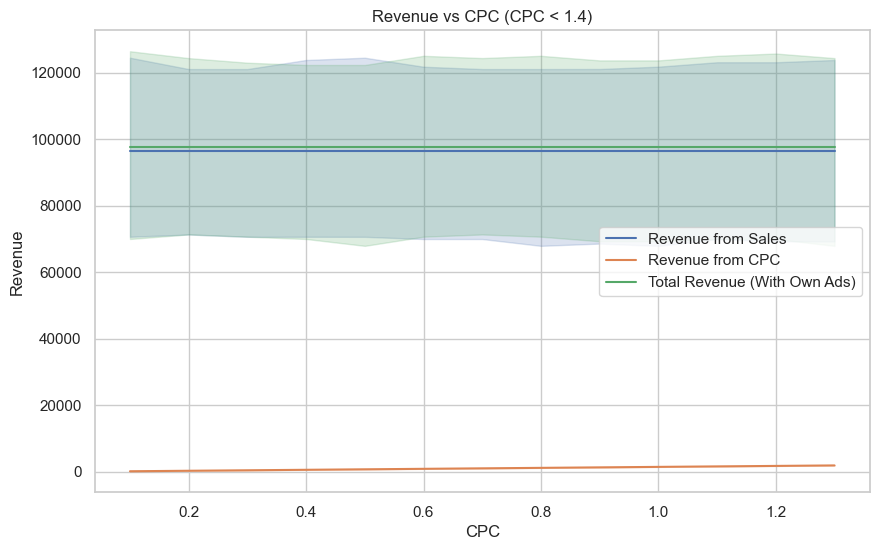

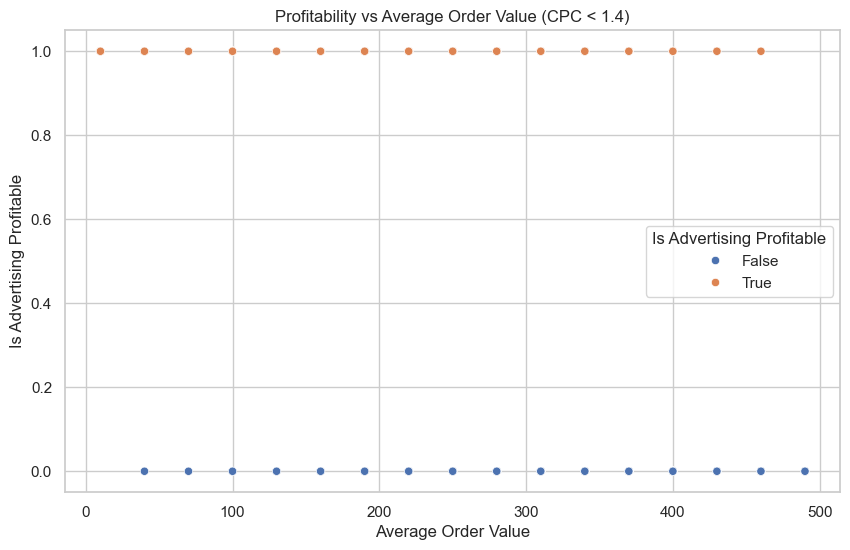

In [241]:
# График зависимости дохода от CPC
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='CPC', y='Revenue from Sales', label='Revenue from Sales')
sns.lineplot(data=filtered_df, x='CPC', y='Revenue from CPC', label='Revenue from CPC')
sns.lineplot(data=filtered_df, x='CPC', y='Total Revenue (With Own Ads)', label='Total Revenue (With Own Ads)')
plt.title('Revenue vs CPC (CPC < 1.4)')
plt.ylabel('Revenue')
plt.xlabel('CPC')
plt.legend()
plt.grid(True)
plt.show()

# График прибыльности рекламы в зависимости от средней стоимости товаров
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Average Order Value', y='Is Advertising Profitable', hue='Is Advertising Profitable')
plt.title('Profitability vs Average Order Value (CPC < 1.4)')
plt.ylabel('Is Advertising Profitable')
plt.xlabel('Average Order Value')
plt.grid(True)
plt.show()


Выводы: (пойдем по порядку изучения)

Т.к более подробной информации о стоимости товаров, годовой прибыли и выручки магазина нам не дано, то предлагаю расммотреть несколько значений средних цен на товары (средняя стоимость одного товара в магазине) и ряд цен, за которые потенциально можно продавать рекламу (по CPC). Я рассмотрела сводную таблицу для всех значений прибыли, которую можем получить при различных средних значениях цен на товары и при различных ценах за клик.

Проанализировав всю таблицу, невдаваясь в потробности, определелили, что для большинства значений продавать рекламу для нас выгоднее 

Процентное распределение:
- Процент прибыльных случаев: 79.22%
- Процент неприбыльных случаев: 20.78%.

 Однако, посмотрев на датасет с результатами, я заметила, что количетво значений TRUE в колонкее Is Advertising Profitable увеличивается с увеличением значения СPC. И в какой-то момент значение становится TRUE для всех средних значений  цен  на товары. Нашла это значение CPC: Минимальное значение CPC, при котором реклама  выгодна для всех средних стоимостей товара: 1.4

1) Если продавать рекламу дороже >= 1.4$, сделка будет выгодня для компании при любой средней стоимости товара до 500$

Теперь осталось понять, что просиходит с выгодой при значениии CPC < 1.4$. Выяснили, что количетсво прибыльных и не прибыльных вариантов примерно равно по количеству при разных средних стоимостях товара, более того, если посмотреть на график предпоследний, где мы рассматриваем прибуль без рекламы и с рекламой(синяя и зеленная линия), то видим, что разница в прибыли глобольно различается не так уж и сильно. Построили график зависимости средней стоимости заказа и прибыльности с продажи реклами при СРС < 1.4. (самый последни график) Видим, что он так же потдверждает, что количетво прибыльных и неприбыльных случаев примерно равно, одного графики различны на их крайних значениях: продавать рекламу будет не выгодно при  очень больших средних стоимостях товара и, наоборот, будет выгодно при мальних средних ценах за товар. 

2) Чем больше выручка магазина за год и больше средняя стоимость товаров, тем менее прибыльно продавать рекламу по системе СРС при значении < 1.4$.

Однозначно дать ответ на поставленный вопрос нельзя, ведь мы не знаем выручку компании и возможные стоимости продажи рекламы, стоит запросить дополнительные данные для более глубокого анализа. Из данных, которые мы имеем сейчас, однозначно можно сказать лишь то, что выгоднее будет продавать рекламу по цене > 1.4.